In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

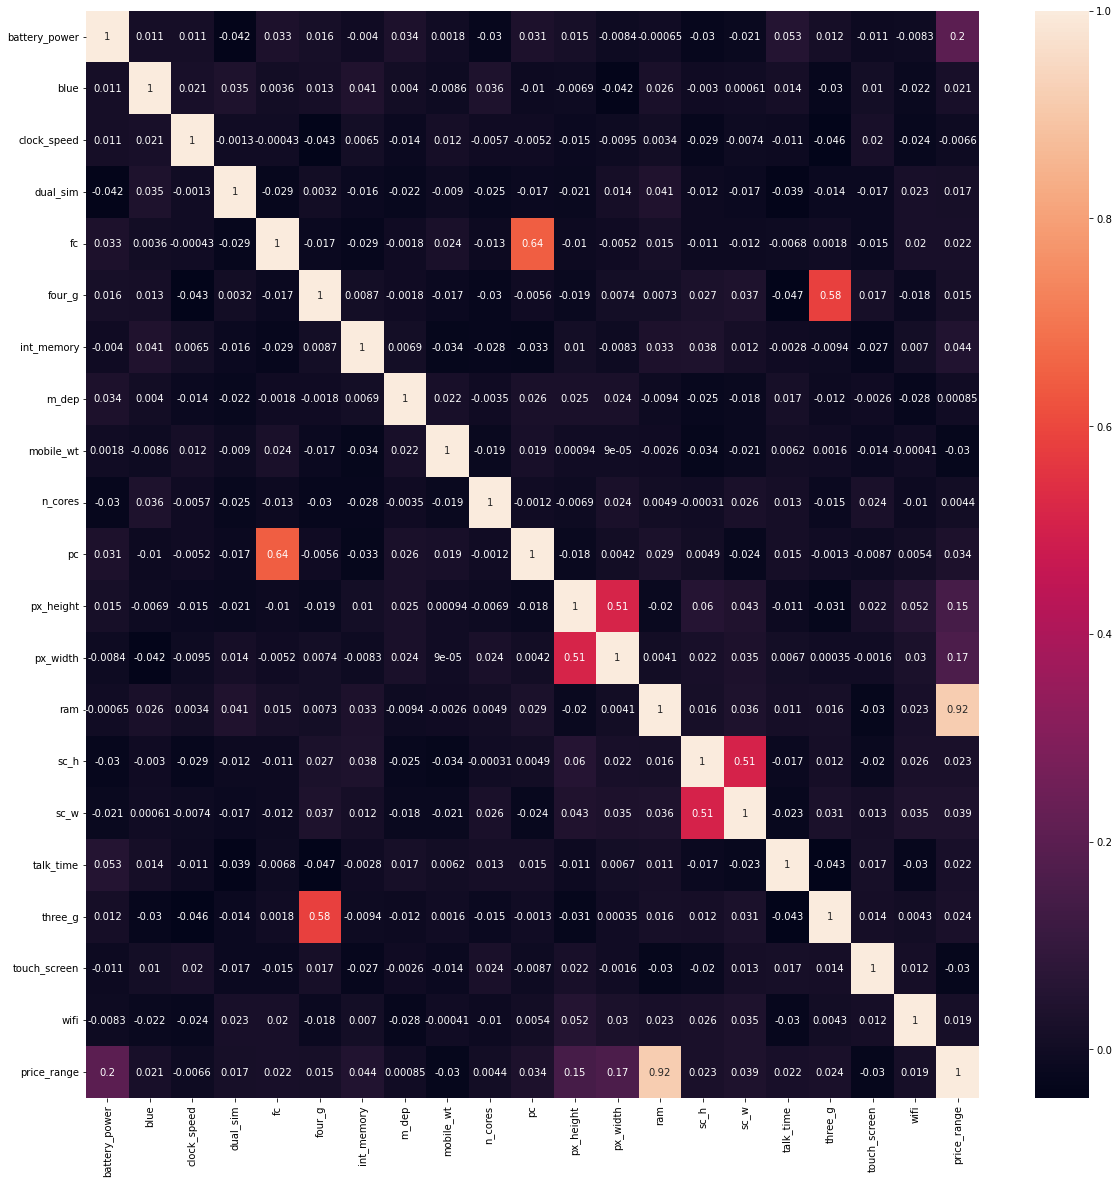

In [7]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr() , annot = True)
plt.show()

In [8]:
df.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

<module 'matplotlib.pyplot' from 'C:\\Users\\tzuan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

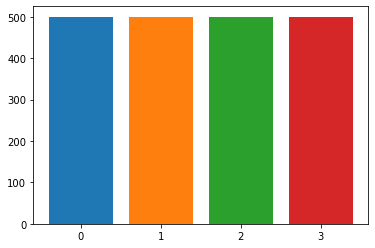

In [9]:
vals = df["price_range"].value_counts()
plt.bar("0",vals[0])
plt.bar("1",vals[1])
plt.bar("2",vals[2])
plt.bar("3",vals[3])
plt

In [10]:
X = df.drop(columns = "price_range")
Y = df["price_range"]

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(Y)

In [12]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train,Y_test = train_test_split(X , y , random_state = 2 , test_size = 0.2)

In [13]:
import keras


from keras.models import Sequential
from keras.layers import Conv2D

model1 = Sequential()

In [19]:
model1.add(keras.layers.Dense(units = 32 , activation = 'relu'))

model1.add(keras.layers.Dense(units = 20 , activation = 'relu'))

model1.add(keras.layers.Dense(units = 8 , activation = 'softmax'))



model1.compile(loss = "sparse_categorical_crossentropy" , optimizer = "adam" ,  metrics=["accuracy"])


history = model1.fit(X_train , Y_train , batch_size=35, epochs = 70)

Epoch 1/70
46/46 [==============================] - 1s 858us/step - loss: 1.9652 - accuracy: 0.4475
Epoch 2/70
46/46 [==============================] - 0s 797us/step - loss: 1.7196 - accuracy: 0.4094
Epoch 3/70
46/46 [==============================] - 0s 797us/step - loss: 1.4991 - accuracy: 0.4281
Epoch 4/70
46/46 [==============================] - 0s 775us/step - loss: 1.3142 - accuracy: 0.4712
Epoch 5/70
46/46 [==============================] - 0s 775us/step - loss: 1.2391 - accuracy: 0.4387
Epoch 6/70
46/46 [==============================] - 0s 797us/step - loss: 1.1361 - accuracy: 0.4462
Epoch 7/70
46/46 [==============================] - 0s 797us/step - loss: 1.0893 - accuracy: 0.4519
Epoch 8/70
46/46 [==============================] - 0s 797us/step - loss: 1.0764 - accuracy: 0.4831
Epoch 9/70
46/46 [==============================] - 0s 797us/step - loss: 1.0457 - accuracy: 0.4731
Epoch 10/70
46/46 [==============================] - 0s 930us/step - loss: 1.0667 - accuracy: 0.4875

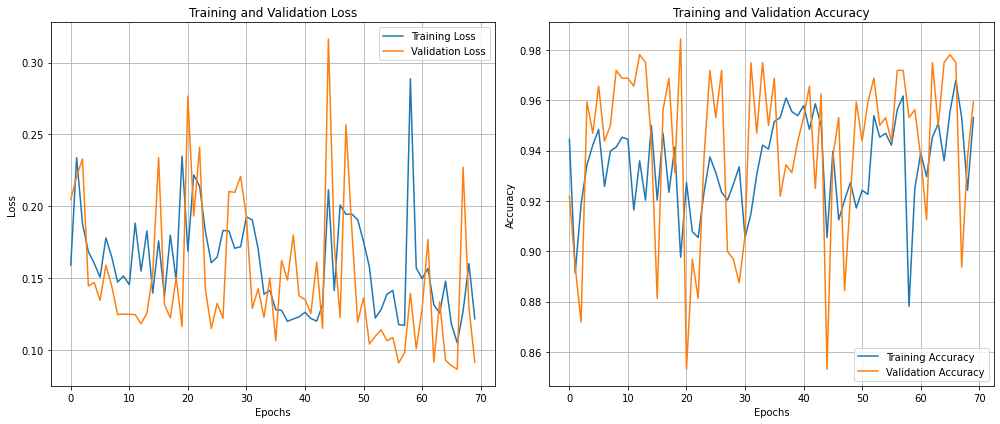

In [23]:


# 绘制训练和验证过程中的损失和准确率图表
plt.figure(figsize=(14, 6))

# 绘制损失图表
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# 绘制准确率图表
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                672       
                                                                 
 dense_1 (Dense)             (None, 20)                660       
                                                                 
 dense_2 (Dense)             (None, 8)                 168       
                                                                 
Total params: 1,500
Trainable params: 1,500
Non-trainable params: 0
_________________________________________________________________


In [16]:
model1_predict = model1.predict(X_test)

13/13 [==============================] - 0s 581us/step


In [20]:
!pip install pydot
!pip install graphviz

In [21]:
from keras.utils import plot_model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
